In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')

In [3]:
len(mnist['data'])
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


'9'

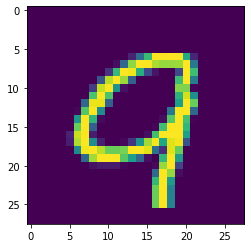

In [4]:
plt.imshow(mnist['data'][3000].reshape(28,28))
mnist['target'][3000]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = mnist['data']
y = mnist['target'].astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
y

array([5, 0, 4, ..., 4, 5, 6])

In [7]:
y_train_5 = (y_train == 5)
y_train_5

array([ True, False, False, ..., False, False, False])

In [8]:
y_train_5.shape

(56000,)

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

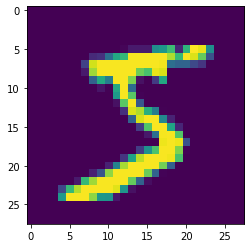

In [11]:
plt.imshow(X[0].reshape(28,28))

In [12]:
model.predict(X[0].reshape(1,-1))

array([5])

In [13]:
from sklearn.model_selection import cross_val_predict

In [14]:
y_train_preds = cross_val_predict(model, X_train, y_train, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix

In [33]:
cM = confusion_matrix(y_train, y_train_preds)
%matplotlib inline

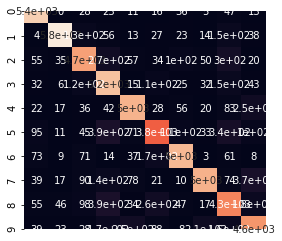

In [32]:
sns.heatmap?
sns.heatmap(cM, annot=True, cbar=False, square=True, xticklabels=False)
plt.xlabel='Predicted Values'
plt.ylabel='Actual Values'